# Exploratory Data Analysis - Retail Online Company

### Importing all the important libraries for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = r'C:\Users\Shehran\Downloads\SampleSuperstore.csv'
data = pd.read_csv(path)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [78]:
# Statistic Views of the data
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


As you can see in the above table, mean profit of the company is in positive but it is very low.

In [3]:
data.Country.unique()

array(['United States'], dtype=object)

This company is located in "United States" as there is no other countries featuring the dataset.

In [4]:
data.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [5]:
data.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [6]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

SuperStore provide four shipping mode
* Second Class
* Standard Class
* First Class
* Same Day

In [7]:
data.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

The products company is selling on its site
* Bookcases
* Chairs
* Labels
* Tables
* Storage
* Furnishings
* Art
* Phones
* Binders
* Appliances
* Paper
* Accessories
* Envelopes
* Fasteners
* Supplies
* Machines
* Copiers

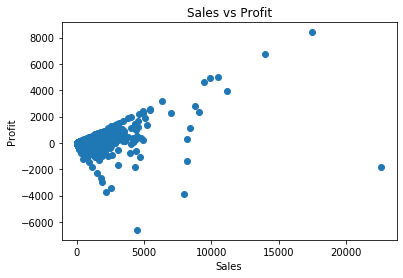

In [9]:
plt.scatter(data.Sales, data.Profit)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs Profit")
#plt.plot(y, Profit)
plt.show()

On normal scales profit increases when sales increases, but in the above graph there are many entries
which are losing as sales is increasing

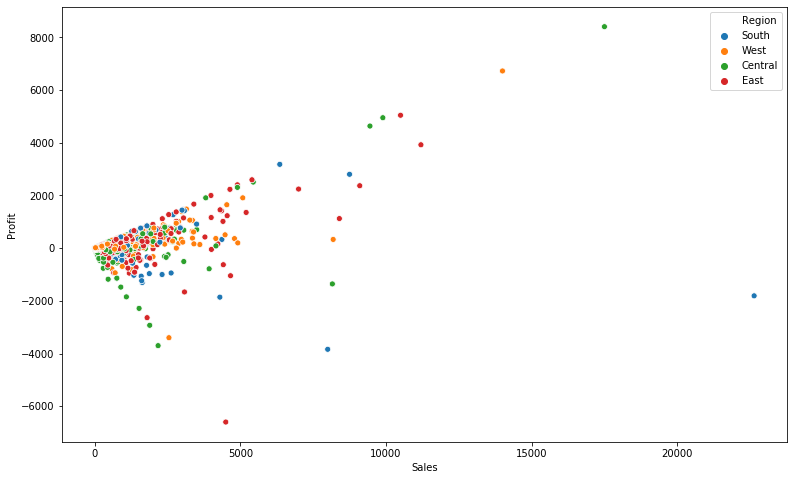

In [81]:
plt.figure(figsize = (13,8))
sns.scatterplot(x='Sales',y='Profit',data = data,hue = 'Region')
# West region is doing better than others

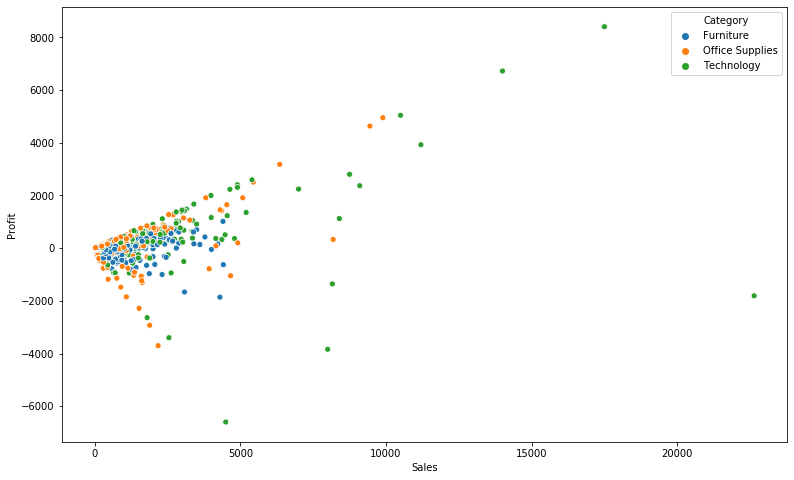

In [85]:
plt.figure(figsize = (13,8))
sns.scatterplot(x='Sales',y='Profit',data = data,hue = 'Category')
# Office Supplies produces profit and loss on low level
# Technology has some outliers with huge profit and loss

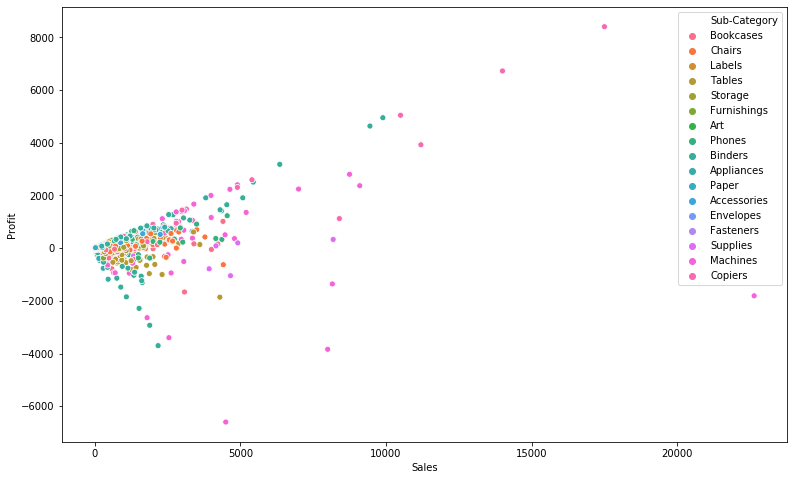

In [84]:
plt.figure(figsize = (13,8))
sns.scatterplot(x='Sales',y='Profit',data = data,hue = 'Sub-Category')

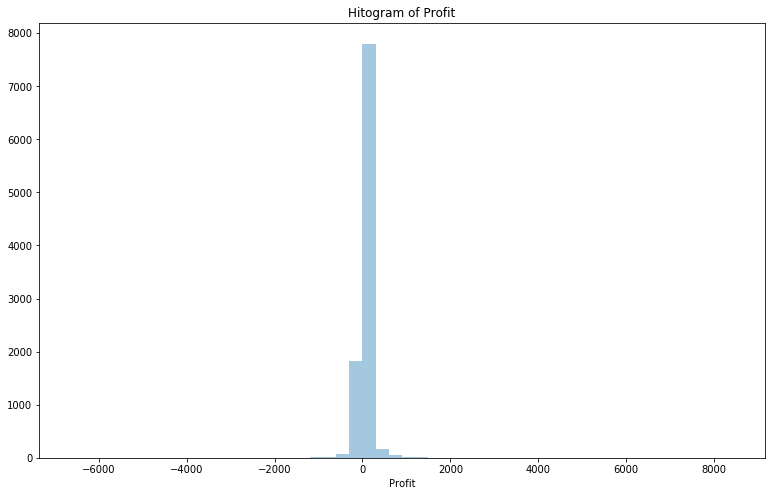

In [86]:
plt.figure(figsize = (13,8))
sns.distplot(data['Profit'],kde =  False).set_title("Hitogram of Profit")
plt.show()

Here we will add new column PvL or Profit vs Loss.
In this column there are two catagorical values Profit and Loss

In [14]:
Pvl=pd.Series([])
for i in range(len(data)):
    if data["Profit"][i] > 0:
        Pvl[i] = 'Profit'
    else:
        Pvl[i] = 'Loss'
    
data.insert(loc = 11,column ='PvL',value = Pvl)

C:\Users\Shehran\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [15]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,PvL,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,Profit,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,Profit,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,Profit,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,Loss,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,Profit,0.20,2.5164


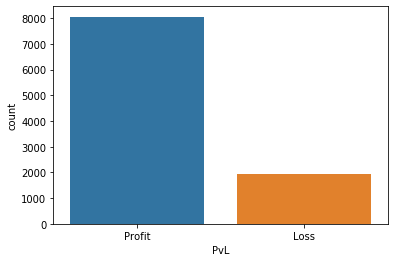

In [36]:
sns.countplot('PvL',data =data)

Which category of products are giving us huge sales with profit.

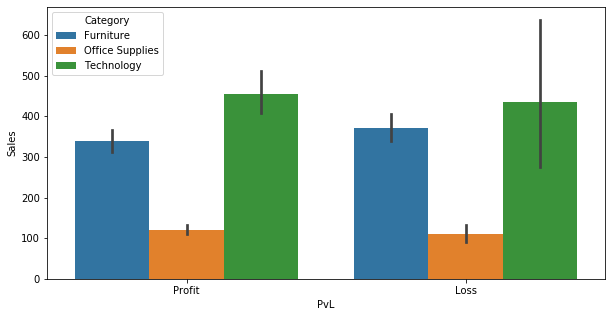

In [90]:
plt.figure(figsize = (10,5))
sns.barplot(y='Sales', x='PvL',data =data,hue = 'Category')
# Technology is in high demand.It can give you huge profit and loss
# Office Supplies is the safe play neither get high loss or profit

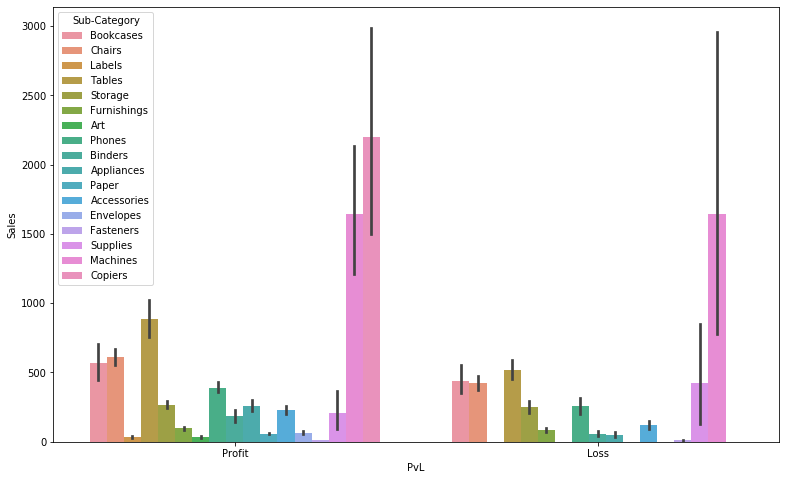

In [92]:
plt.figure(figsize = (13,8))
sns.barplot(y='Sales', x='PvL',data =data,hue = 'Sub-Category')
# Copier is the best product with highest sales with profit.
# Machine gives better sales in profit than loss.

Discounts is one of the strategy to increase sales of product.

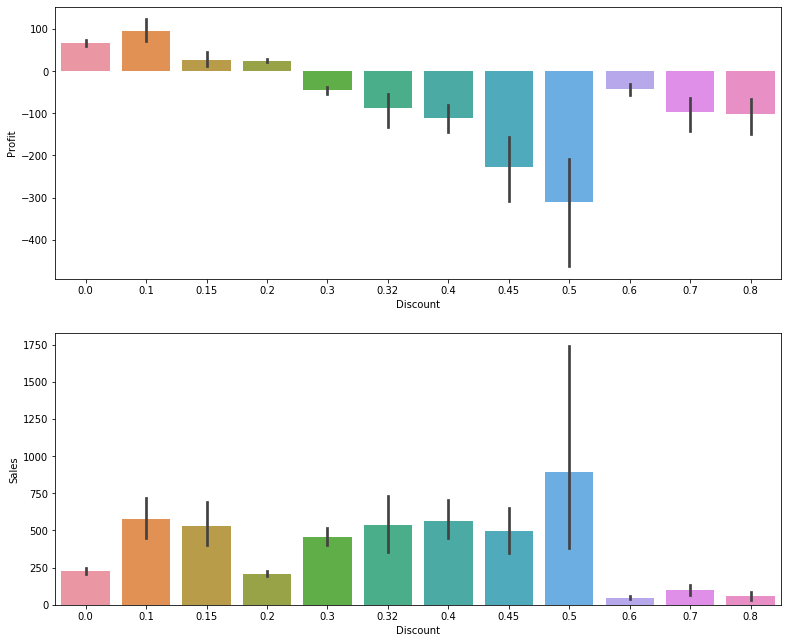

In [99]:
# Discount vs Profit/Sales
plt.figure(figsize = (13,11))

plt.subplot(2,1,1)
sns.barplot(x='Discount',y='Profit',data = data)

plt.subplot(2,1,2)
sns.barplot(x='Discount',y='Sales',data = data)

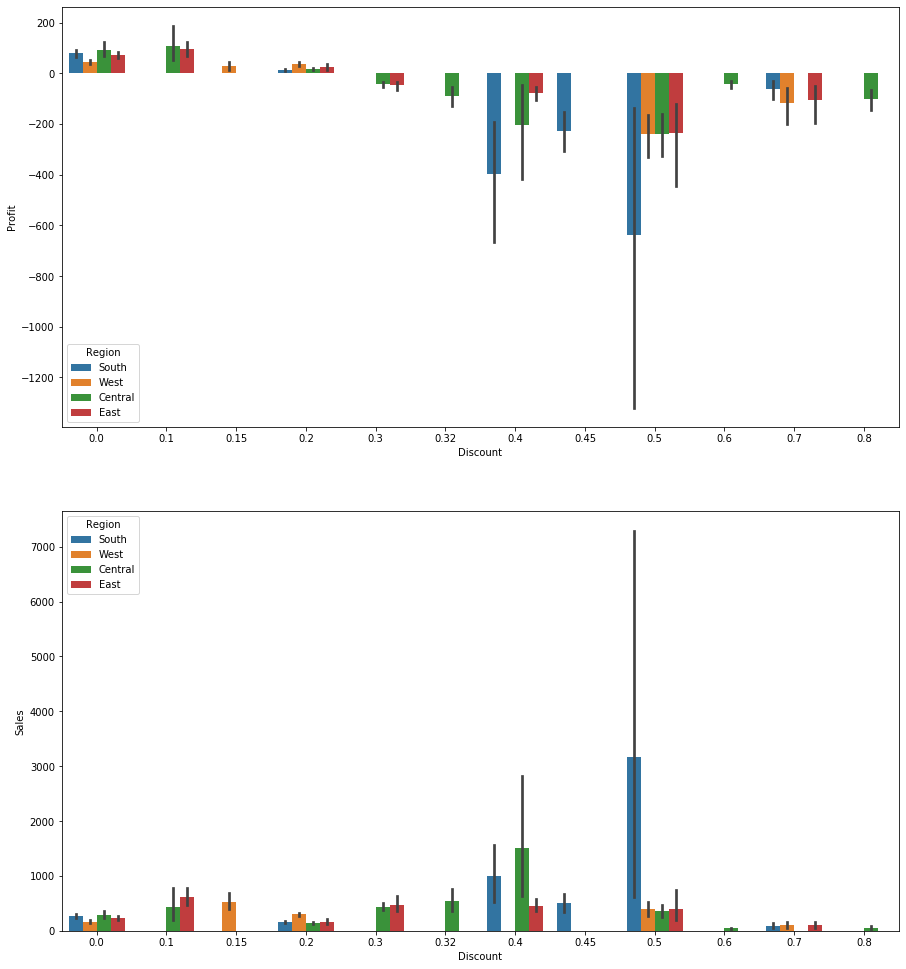

In [103]:
#the ideology of discount is to increase the sales
plt.figure(figsize = (15,17))
plt.subplot(2,1,1)
sns.barplot(x='Discount',y='Profit',data = data,hue = 'Region')

plt.subplot(2,1,2)
sns.barplot(x='Discount',y='Sales',data = data,hue = 'Region')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

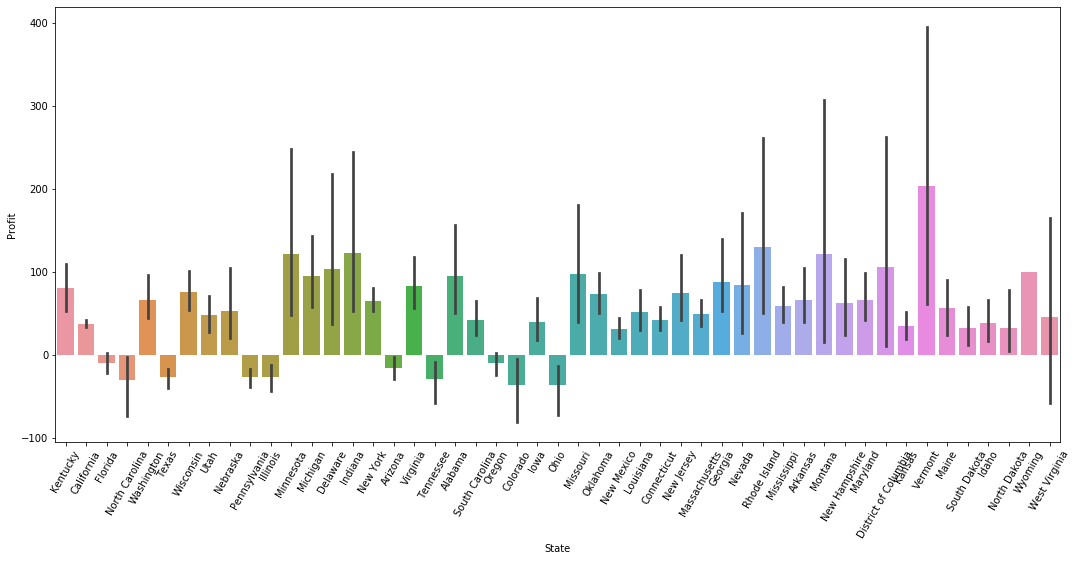

In [112]:
#which state makes more profit
plt.figure(figsize = (18,8))

sns.barplot(x='State',y='Profit',data = data)
plt.xticks(rotation=60)
# 10 out of 49 states are in losess
# Vermont is the highest profit making state
# Colorado is highest in loss

<Figure size 1224x576 with 0 Axes>

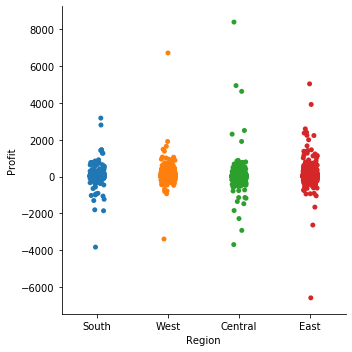

In [115]:
plt.figure(figsize = (17,8))
sns.catplot(x='Region',y='Profit',data = data)

Which is the most used shipping mode?

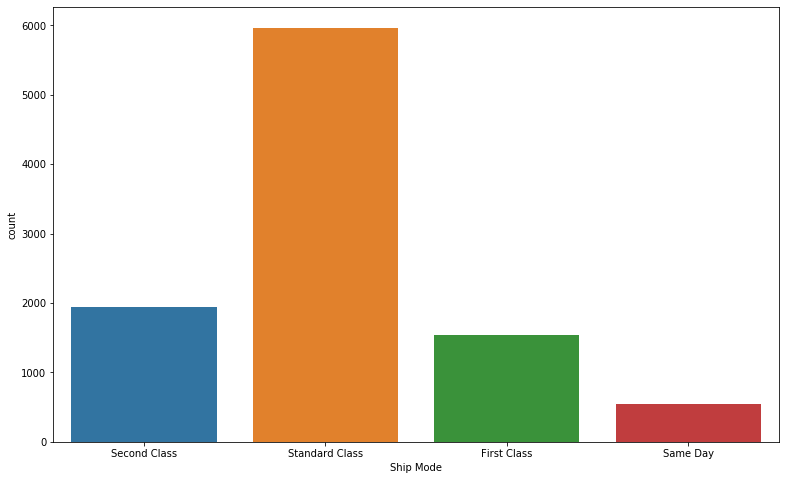

In [116]:
plt.figure(figsize = (13,8))
sns.countplot('Ship Mode',data =data)

What are the most and least buied product?

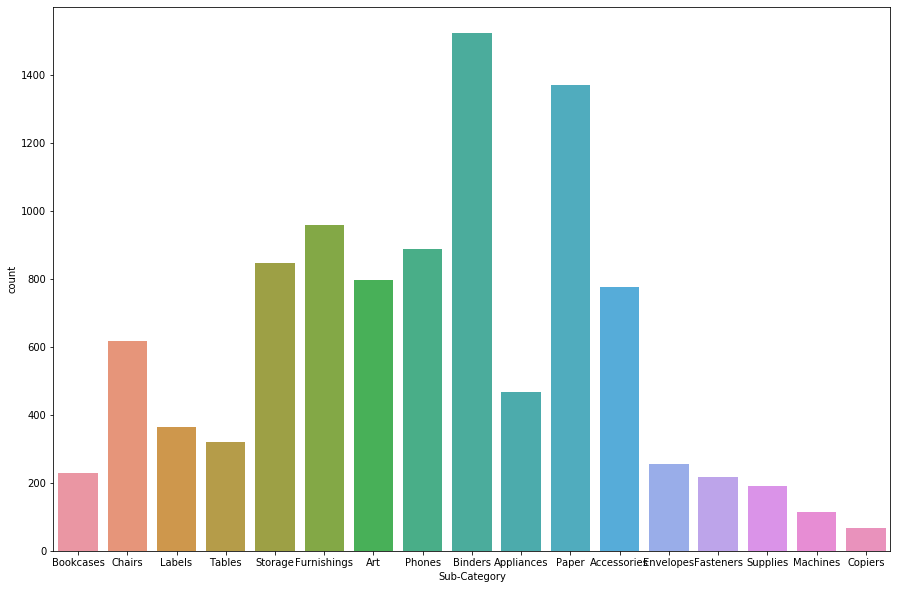

In [63]:
plt.figure(figsize = (15,10))
sns.countplot('Sub-Category',data =data)

Who are the majority of the customer?

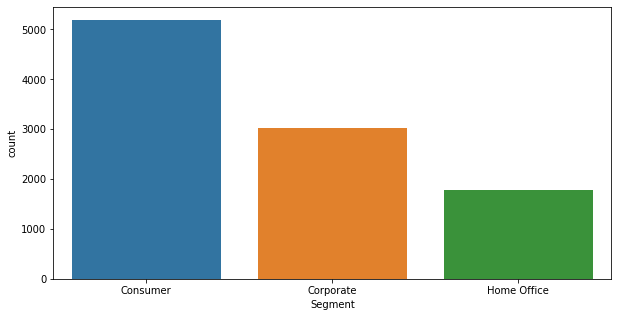

In [120]:
plt.figure(figsize = (10,5))
sns.countplot('Segment',data =data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

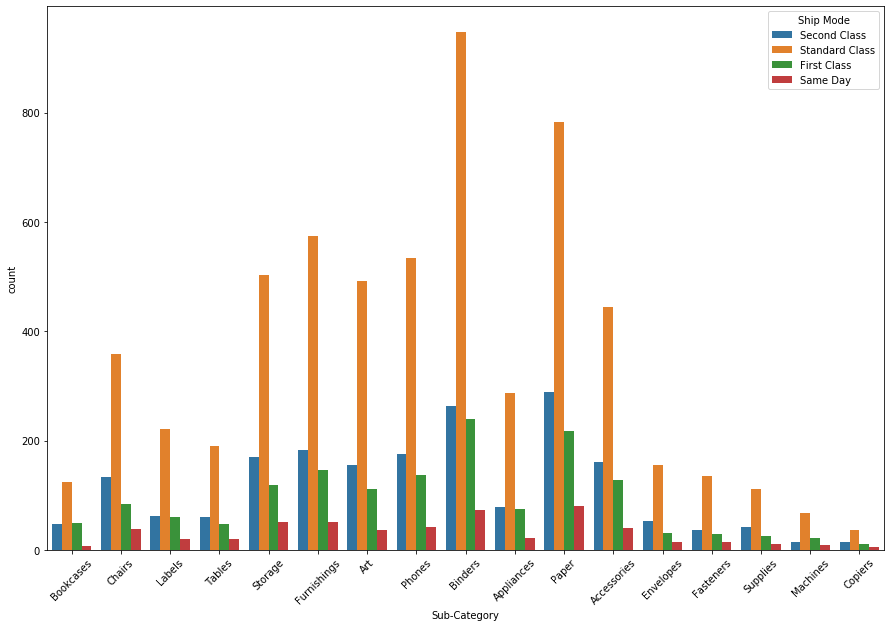

In [70]:
plt.figure(figsize = (15,10))
sns.countplot('Sub-Category',data =data,hue = 'Ship Mode')
plt.xticks(rotation = 45)